<a href="https://colab.research.google.com/github/ezzat123-create/ML-55-19210/blob/main/Exercise10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Classification

In this exercise we will be tuning the RandomForest hyperparameters

Satrt by Importing useful libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Reading the data which is included in the 'data_banknote_authentication.csv' file

In [3]:
df = pd.read_csv("/content/data_banknote_authentication.csv")
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


Diving the data into features and labels (X and y)

In [6]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class']

Splitting the data into train and test parts

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Use the RandomForest model with a GridSearch to optimize 'n_estimators', 'max_features' and 'criterion' parameters

In [9]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10,max_features='sqrt',random_state=101)
model.fit(X_train,y_train)
preds = model.predict(X_test)

Evaluate the model by displaying a confusion matrix and a classification report

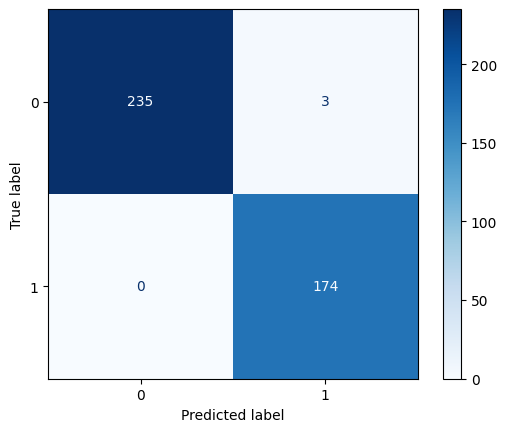

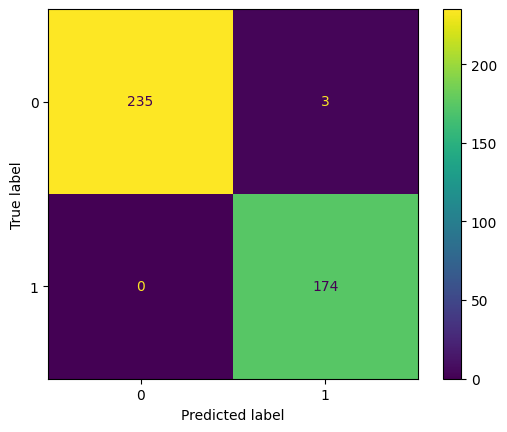

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
# Import ConfusionMatrixDisplay for plotting
from sklearn.metrics import ConfusionMatrixDisplay

# Evaluate the model by displaying a confusion matrix and a classification report
confusion_matrix(y_test,preds)

# Plot the confusion matrix using ConfusionMatrixDisplay
# display_matrix = ConfusionMatrixDisplay(confusion_matrix(y_test, preds)) # Alternatively, you can create from precomputed matrix
display_matrix = ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test,
    # display_labels=[0, 1], # You can specify labels if needed
    cmap=plt.cm.Blues # You can choose a different colormap
)
display_matrix.plot()
plt.show() # Show the plot

In [14]:
test_error = []

for n in range(1,40):
    # Use n random trees
    model = RandomForestClassifier(n_estimators=n,max_features='sqrt')
    model.fit(X_train,y_train)
    test_preds = model.predict(X_test)
    test_error.append(1-accuracy_score(test_preds,y_test))


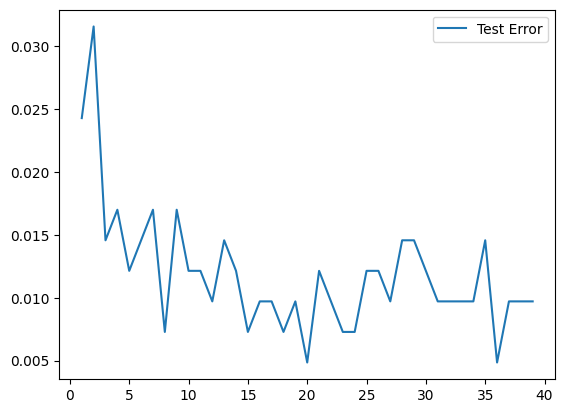

In [15]:
plt.plot(range(1,40),test_error,label='Test Error')
plt.legend()